In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# file path
dir_path='C:/Users/User/Documents/application_train.csv'
# read file
f_app=os.path.join(dir_path)
app_train=pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# 將 DAYS_BIRTH欄位資料全部取絕對值
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
# 根據年齡分成不同組別
age_data=app_train[['TARGET','DAYS_BIRTH']]
age_data['YEAR_BIRTH']=age_data['DAYS_BIRTH']/365

# 從20到70歲切11個點
bin_cut=np.linspace(20,70,num=11)
age_data['YEAR_BIN']=pd.cut(age_data['YEAR_BIRTH'],bins=bin_cut)
print(age_data['YEAR_BIN'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEAR_BIN, dtype: int64


,TARGET,DAYS_BIRTH,YEAR_BIRTH,YEAR_BIN
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


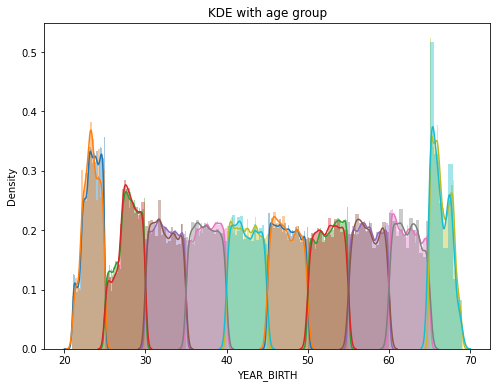

[Interval(20.0, 25.0, closed='right') Interval(25.0, 30.0, closed='right')
 Interval(30.0, 35.0, closed='right') Interval(35.0, 40.0, closed='right')
 Interval(40.0, 45.0, closed='right') Interval(45.0, 50.0, closed='right')
 Interval(50.0, 55.0, closed='right') Interval(55.0, 60.0, closed='right')
 Interval(60.0, 65.0, closed='right') Interval(65.0, 70.0, closed='right')]


In [3]:
# 排序並作圖

year_group_sorted=np.sort(age_data['YEAR_BIN'].unique())

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
# 繪製不同YEAR_BIN 下對應target=1和 0 的YEAR_BIRTH值
    sns.distplot(age_data.loc[(age_data['YEAR_BIN']==year_group_sorted[i])&\
                                (age_data['TARGET']==0),'YEAR_BIRTH'],label=str(year_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['YEAR_BIN']==year_group_sorted[i])&\
                                (age_data['TARGET']==1),'YEAR_BIRTH'],label=str(year_group_sorted[i]))
plt.title('KDE with age group')
plt.show()
print(year_group_sorted)

In [4]:
# 計算各年寧區間的 TARGET、DAYS_BIRTH、YEARA_BIRTH平均值
age_groups=age_data.groupby('YEAR_BIN').mean()
age_groups

,TARGET,DAYS_BIRTH,YEAR_BIRTH
YEAR_BIN,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'failure to repay by age group')

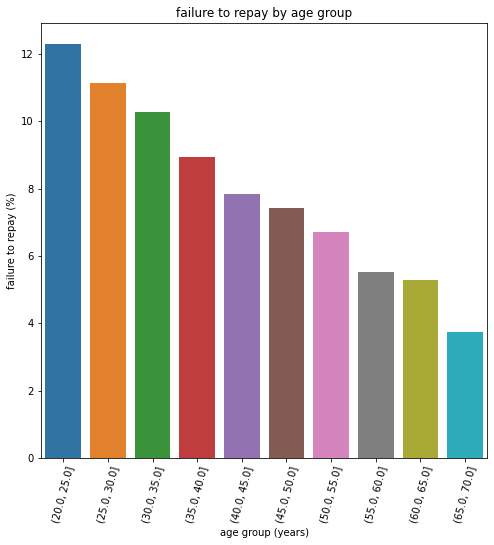

In [5]:
plt.figure(figsize=(8,8))
# 以年齡區間為x,terget 為 y 繪製barplot
px=age_groups.index.astype(str)  # 將先前YEAR_BIN的指標轉乘string的形式
py=100*age_groups['TARGET']
sns.barplot(x=px,y=py)

plt.xticks(rotation=75);
plt.xlabel('age group (years)');
plt.ylabel('failure to repay (%)');
plt.title('failure to repay by age group')